In [1]:
import sys, os
sys.path.append('../src')
import numpy as np
from scipy import interpolate
from numba import jit, float64
import time, multiprocessing, pickle
from U1Funcs import DMvRatesGen
from StatisticFuncs import *
from WIMPFuncs import C_SI
from Params import *
from U1PlotFuncs import *

In [2]:
#========================== Experimental setup =========================================#
ne = 10 
E_th = 1*1e-2*1e-6 # Threshold
E_max = 8*1e-6 # Max recoil energy
Nuc = Xe131
#========================== Energy transition function for CEvNS =========================================#
myPath = os.path.join(os.path.abspath(os.path.pardir),'data','detection')
ERList, ionLow, ionFiducial, ionHigh = np.loadtxt(os.path.join(myPath,'ionXenonDat.csv'),delimiter=',')
neERFunc = np.vectorize(interpolate.interp1d(ERList,ionFiducial))
#========================== DM-electron Rates =========================================#
temp = np.loadtxt(os.path.join(myPath,'DMElectronStandard.csv'),delimiter=',')
mDMList = temp[:,0]
DMElectronStandardList = temp[:,1:11]
#========================== Initialize fog =========================================#
fogGen=Fog()
#========================== Model and other parameters =========================================#
selList=np.array([1,3]) # only 8B and hep neutrinos are considered
thresholdBin=3
b0Level=0.

In [3]:
def contourGen(paraGenClass, FogGenClass):
    exposureEndLog, dExpoLog, CL, b0Level = 8., 0.1, 0.9, 0.
    paraGenClass.setDMMass(0.1)
    NPDiscoveryExposure = biSearch(1., 8, findNPDiscoveryExposure, [paraGenClass, CL, b0Level], 0., 0)[0]
    print(NPDiscoveryExposure)
    paraList = exposureEndLog, dExpoLog, CL, b0Level, NPDiscoveryExposure
    res=resGen(mDMList,paraGenClass, FogGenClass,paraList)
    #return vsContourDatGen(res[0], res[1])
    return res

In [4]:
modelParaList = [[np.log10(2e-5),np.log10(30e-3),1,1,1],\
    [np.log10(4e-5),np.log10(20e-3),1/3,1/3,-1], [np.log10(8e-4),np.log10(16e-3),[0,1,-1]]]
paraGenList = [StatisticClass(SpectrumER(mDMList, DMElectronStandardList, neERFunc, \
            E_th, E_max, ne, Nuc,modelParaList[0], selList, thresholdBin), 'SMvsDMNP'),\
               StatisticClass(SpectrumER(mDMList, DMElectronStandardList, neERFunc, \
            E_th, E_max, ne, Nuc,modelParaList[1], selList, thresholdBin), 'DMvsNP'),\
               StatisticClass(SpectrumER(mDMList, DMElectronStandardList, neERFunc, \
            E_th, E_max, ne, Nuc,modelParaList[2], selList, thresholdBin=thresholdBin,mode='FD'), 'DMvsNP')]

[['0' 'pep']
 ['1' 'hep']
 ['2' '7Be2']
 ['3' '8B']
 ['4' '13N']
 ['5' '15O']
 ['6' '17F']
 ['7' 'DSNB']
 ['8' 'Atm']
 ['9' 'GeoU']
 ['10' 'GeoTh']
 ['11' 'GeoK']
 ['12' 'Reactor']]
[['0' 'pep']
 ['1' 'hep']
 ['2' '7Be2']
 ['3' '8B']
 ['4' '13N']
 ['5' '15O']
 ['6' '17F']
 ['7' 'DSNB']
 ['8' 'Atm']
 ['9' 'GeoU']
 ['10' 'GeoTh']
 ['11' 'GeoK']
 ['12' 'Reactor']]
[['0' 'pep']
 ['1' 'hep']
 ['2' '7Be2']
 ['3' '8B']
 ['4' '13N']
 ['5' '15O']
 ['6' '17F']
 ['7' 'DSNB']
 ['8' 'Atm']
 ['9' 'GeoU']
 ['10' 'GeoTh']
 ['11' 'GeoK']
 ['12' 'Reactor']]


In [5]:
exposureEndLog, dExpoLog, CL, b0Level = 4., 0.1, 0.9, 0.
paraGenList[0].setDMMass(0.1)
NPDiscoveryExposure = biSearch(1., 8, findNPDiscoveryExposure, [paraGenList[0], CL, b0Level], 0., 0)[0]
print(NPDiscoveryExposure)
paraList = exposureEndLog, dExpoLog, CL, b0Level, NPDiscoveryExposure
myMul(0.1, paraGenList[0],fogGen,paraList)

2.53515625


[-41.570084827401146,
 [array([-39.6875    , -39.7375    , -39.84416667, -39.91679078,
         -39.97960082, -40.05404236, -40.14226936, -40.20233881,
         -40.27353223, -40.35790962, -40.41535805, -40.48344509,
         -40.56414083, -40.63393174, -40.69429145, -40.74649444,
         -40.80836465, -40.88169231, -40.94511083, -40.99995927,
         -41.06496484, -41.12118586, -41.16980946, -41.22743742,
         -41.29573723, -41.35480733, -41.40589499, -41.46644332,
         -41.51880945, -41.56409907, -41.61777566, -41.68139236,
         -41.72470586, -41.77604037, -41.83688128, -41.87830488,
         -41.92739951, -41.96985973, -42.02018296, -42.06370575,
         -42.10134708, -42.14595903, -42.18454234]),
  array([-0.45446797, -0.3875089 , -0.24367663, -0.15050264, -0.05860149,
          0.04315319,  0.170954  ,  0.25672396,  0.35805883,  0.48513287,
          0.57083383,  0.67198456,  0.79825476,  0.90660373,  0.99798977,
          1.08661208,  1.18535602,  1.30718765,  1.41

In [6]:
resList1=[contourGen(paraGen,fogGen) for paraGen in paraGenList]

2.53515625
Time costed: 189.1977939940989 s.
1.62890625
Time costed: 250.77163916802965 s.
2.84765625
Time costed: 222.29893268900923 s.


In [13]:
def ax1Func(ax1, dat, color, label=False, topLabel=False):
    n = 5
    colors = np.zeros([n,4])
    colors[0] = mpl.colors.to_rgba(color)
    colors[:] = mpl.colors.to_rgba(color)
    colors[:,3] = [0., 0.2, 0.4, 0.6, 0.8]
    cmap = mpl.colors.ListedColormap(colors, name='test')
    m,sig,n = vsContourDatGen(1e3*dat[0], dat[1])
    cnt = ax1.contourf(m,sig,n,np.array([0.,1., 2., 3., 4., 90.]),\
                       colors=colors,antialiased=True,zorder=20)
    for c in cnt.collections:
        c.set_edgecolor("face")
    if label:
        ax1.fill_between([-2,-1],[1,1],[2,2],color=color,alpha=0.5,label=label)
    if topLabel:
        cmap2 = mpl.colors.ListedColormap(colors[1:-1], name='test')
        cmap2.set_under(color=color, alpha=0.)
        cmap2.set_over(color=color, alpha=1.)
        im = plt.pcolormesh(-m,sig,n,vmax=4.,vmin=1,cmap=cmap2,rasterized=True,shading='auto')
        fig.subplots_adjust(top=0.8)
        cbar_ax = fig.add_axes([0.1, 0.82, 0.82, 0.02])
        cbar = fig.colorbar(im, cax=cbar_ax,orientation='horizontal',extend='max',extendfrac=0.03, \
                     ticks=[1,2,3,4])
        cbar.set_ticklabels([1,2,3,4])
        cbar_ax.xaxis.set_ticks_position('top')
        plt.gcf().text(0.5,0.883,r'$n = {\rm Exposure}_{\rm Distinction}/{\rm Exposure}_{\rm Discovery}$',fontsize=22,ha='center')
        
LimitPlotFunc = MakeLimitPlot_DMeConstant

In [14]:
resList = resList1
colorList = ['r', 'b', 'g']
labelList = [r'U(1)$_{\rm Universal}$', r'U(1)$_{B-L}$',r'U(1)$_{L_\mu-L_\tau}$']

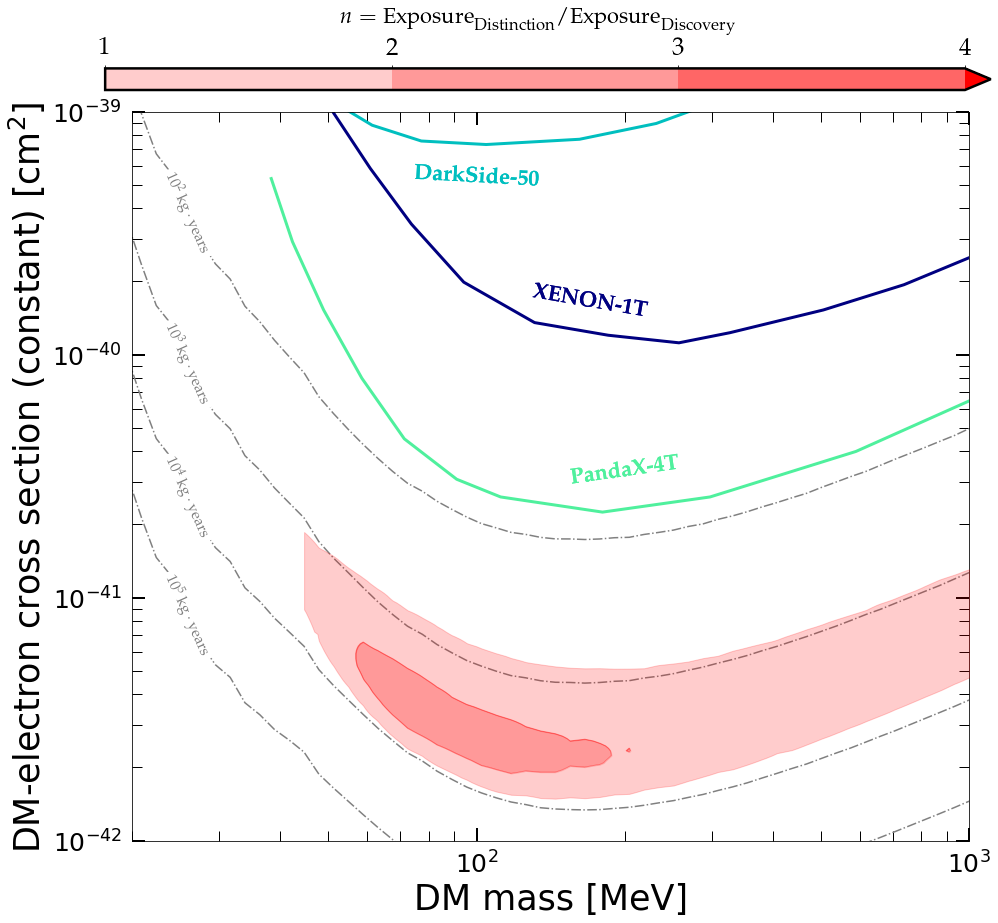

In [15]:
resListUniversal = resList[0]

fig, ax1 = plt.subplots(figsize=(15,15))
# Plot style
lw, tfs = 2.5, 25
lfs = 35
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
mpl.rcParams['text.latex.preamble'] = r'\usepackage{mathpazo}'
#========================== exposure lines =================================================#
expoLogList = np.linspace(1,4,4)
sigma0ContourList = 10**np.transpose([subFindroot(expoLogList, d[1][1], d[1][0]) for d in resList[2][1]])
expoLogLabelList = [r"$10^"+str(i)+r"$ ${\rm kg}\cdot {\rm years}$" \
                                                          for i in range(2,6)]
lines=[]
for i in range(len(expoLogList)):
    l1 = ax1.semilogy(1e3*resList[2][0], sigma0ContourList[i], c='gray', linestyle='-.', label=expoLogLabelList[i])
    lines.extend(l1)
# labelLines([lines[0]], xvals=[8], fontsize=15, outline_width=5)
# labelLines(lines[1:], xvals=[7.5,6.6,5.5], fontsize=15, outline_width=13)
labelLines(lines, xvals=26*np.array([1,1,1,1]), fontsize=15, outline_width=13,drop_label=True)
#========================== limits =======================================================#
ax1, lines=LimitPlotFunc(ax1,xmin=2.0e1,xmax=1e3,ymin=1e-42,ymax=1e-39,\
                     facecolor='darkgray',edgecolor='darkgray',edgecolor_collected='darkgray',\
                     alph=0.5,lfs=35,tfs=25)
#labelLines(lines[1:], xvals=np.array([120,150,200]), fontsize=22,outline_color=[1,0,0,0],ha="left",va="bottom")
labelLines([lines[0]], xvals=[100], fontsize=22,outline_color=[1,0,0,0], yoffsets=-2e-40,drop_label=True)
labelLines([lines[1]], xvals=[170], fontsize=22,outline_color=[1,0,0,0], yoffsets=4e-41,drop_label=True)
labelLines([lines[2]], xvals=[200], fontsize=22,outline_color=[1,0,0,0], yoffsets=1e-41,drop_label=True)
#========================== contour plot =================================================#
dat = resList[0]
color = colorList[0]
ax1Func(ax1, dat, color, label=False, topLabel=True)
#=========================== labels ===================================================#
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r"DM mass [MeV]",fontsize=lfs)
ax1.set_ylabel(r"DM-electron cross section (constant) [cm$^2$]",fontsize=lfs)
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=10,labelsize=25)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
#=====================================================================================#
p1 = fig

In [16]:
myPathFig = os.path.join(os.path.abspath(os.path.pardir),'plots')
p1.savefig(os.path.join(myPathFig,"DMeConstantDM_SMvsDMNP"+'.pdf'),bbox_inches='tight')
p1.savefig(os.path.join(myPathFig,'png','DMeConstantDM_SMvsDMNP.png'),bbox_inches='tight')

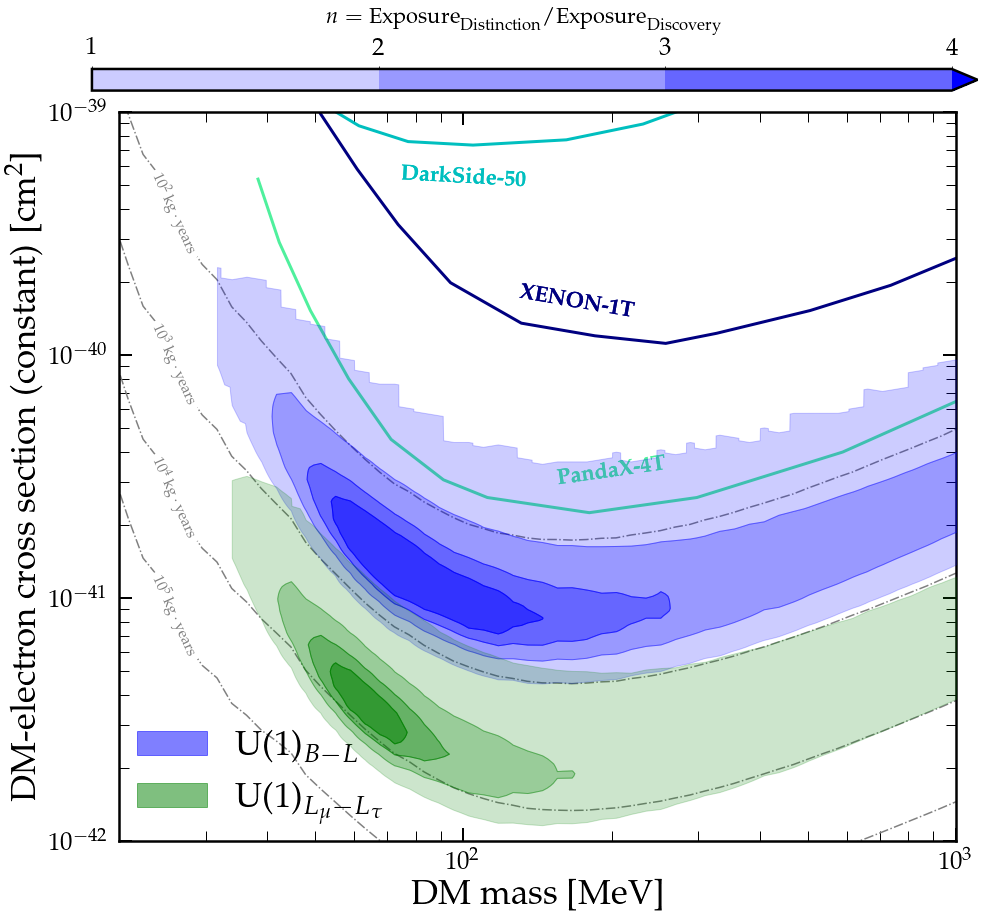

In [17]:
fig, ax1 = plt.subplots(figsize=(15,15))
# Plot style
lw, tfs = 2.5, 25
lfs = 35
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
mpl.rcParams['text.latex.preamble'] = r'\usepackage{mathpazo}'
#========================== exposure lines =================================================#
expoLogList = np.linspace(1,4,4)
sigma0ContourList = 10**np.transpose([subFindroot(expoLogList, d[1][1], d[1][0]) for d in resList[2][1]])
expoLogLabelList = [r"$10^"+str(i)+r"$ ${\rm kg}\cdot {\rm years}$" \
                                                          for i in range(2,6)]
lines=[]
for i in range(len(expoLogList)):
    l1 = ax1.semilogy(1e3*resList[2][0], sigma0ContourList[i], c='gray', linestyle='-.', label=expoLogLabelList[i])
    lines.extend(l1)
# labelLines([lines[0]], xvals=[8], fontsize=15, outline_width=5)
# labelLines(lines[1:], xvals=[7.5,6.6,5.5], fontsize=15, outline_width=13)
labelLines(lines, xvals=26*np.array([1,1,1,1]), fontsize=15, outline_width=13,drop_label=True)
#========================== limits =======================================================#
ax1, lines=LimitPlotFunc(ax1,xmin=2.0e1,xmax=1e3,ymin=1e-42,ymax=1e-39,\
                     facecolor='darkgray',edgecolor='darkgray',edgecolor_collected='darkgray',\
                     alph=0.5,lfs=35,tfs=25)
#labelLines(lines[1:], xvals=np.array([120,150,200]), fontsize=22,outline_color=[1,0,0,0],ha="left",va="bottom")
labelLines([lines[0]], xvals=[100], fontsize=22,outline_color=[1,0,0,0], yoffsets=-2e-40,drop_label=True)
labelLines([lines[1]], xvals=[170], fontsize=22,outline_color=[1,0,0,0], yoffsets=4e-41,drop_label=True)
labelLines([lines[2]], xvals=[200], fontsize=22,outline_color=[1,0,0,0], yoffsets=1e-41,drop_label=True)
#========================== contour plot =================================================#
ax1Func(ax1, resList[1], colorList[1], labelList[1],topLabel=True)
ax1Func(ax1, resList[2], colorList[2], labelList[2])
#=========================== labels ===================================================#
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r"DM mass [MeV]",fontsize=lfs)
ax1.set_ylabel(r"DM-electron cross section (constant) [cm$^2$]",fontsize=lfs)
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=10,labelsize=25)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax1.legend(fontsize=35,frameon=True,loc=(0.005,0.005),framealpha=0,)
#=====================================================================================#
p2 = fig

In [ ]:
myPathFig = os.path.join(os.path.abspath(os.path.pardir),'plots')
p2.savefig(os.path.join(myPathFig,"DMeConstantDM_DMvsNP"+'.pdf'),bbox_inches='tight')
p2.savefig(os.path.join(myPathFig,'png','DMeConstantDM_DMvsNP.png'),bbox_inches='tight')

In [10]:
[datGet(resList1[i], 1e-3*100) for i in range(3)]

[-41.27471051 -41.77443866]
[-41.20901912967579, -41.77654130482053]
Sigma:  [-41.27471051 -41.77443866]   [5.31238440e-42 1.68097533e-42]
Exposure:  [2.04274228 2.94498805]   [110.34236169 881.02463134]
max n:  2.411150616215198e-42   2.747381322225444   1158.7713474319155
[-40.51028956 -41.28974598]
error in findroot
[]
Sigma:  [-40.51028956 -41.28974598]   [3.08823573e-41 5.13161447e-42]
Exposure:  [0.90303975 2.03733082]   [  7.99907474 108.97598822]
max n:  1.0000937873927437e-41   5.074601948983605   162.0695911220296
[-41.26690737 -41.89351249]
[-41.19667087552373, -41.89441758728267]
Sigma:  [-41.26690737 -41.89351249]   [5.40869676e-42 1.27787246e-42]
Exposure:  [2.01657643 3.18560102]   [ 103.89064216 1533.20780716]
max n:  2.0826085189386868e-42   2.887436516319681   1637.1045429300277


[None, None, None]

In [11]:
[maxCheck(res[0], res[1]) for res in resList1]

[array([7.24435960e-02, 3.74764809e-42, 2.99068494e+00]),
 array([7.24435960e-02, 1.42276736e-41, 6.28024500e+00]),
 array([6.30957344e-02, 3.64423559e-42, 5.20692745e+00])]